In [6]:
import os
import sys

python_working_dir = !pwd
package_path = '/'.join(python_working_dir[0].split('/')[:-1])
print(package_path)

sys.path.append(package_path)

import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

from fraud_prevention import config
from fraud_prevention.evaluation import threshold_table as threshold_table_module
from fraud_prevention.visualization import utils

DATA_PATH = os.path.join(
    config.PRJ_DIR,
    'models/data.parquet')

/Users/luis.sanchez/c/project


In [7]:
data = pd.read_parquet(DATA_PATH).query('name == "test"')

Text(0.5, 0, 'Model Score')

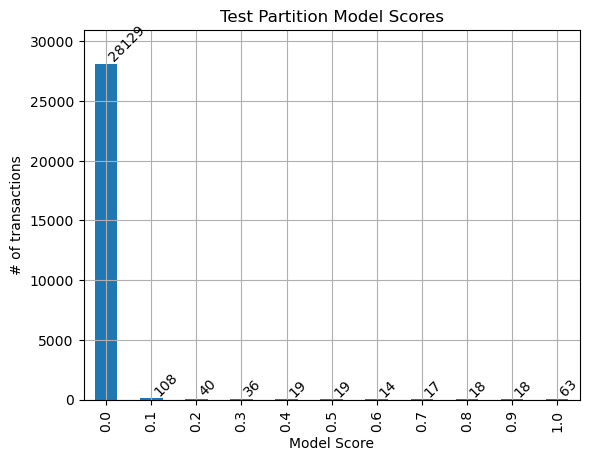

In [8]:
data_plot = data['y_score'].round(1).value_counts().sort_index()
ax = data_plot.plot(
    kind='bar')

utils.add_bar_values(
    ax=ax)
ax.set_ylim(0, data_plot.max() * 1.1)
ax.set_title('Test Partition Model Scores');

ax.set_ylabel('# of transactions')
ax.set_xlabel('Model Score')

In [9]:
y_true, y_score = data['y_true'], data['y_score']

threshold_table = threshold_table_module.compute(
    y_true=y_true, 
    y_score=y_score)

In [10]:
decision_threshold = threshold_table[
    threshold_table['rejected_fraud_percent'] > .2
].sort_index().index[0]

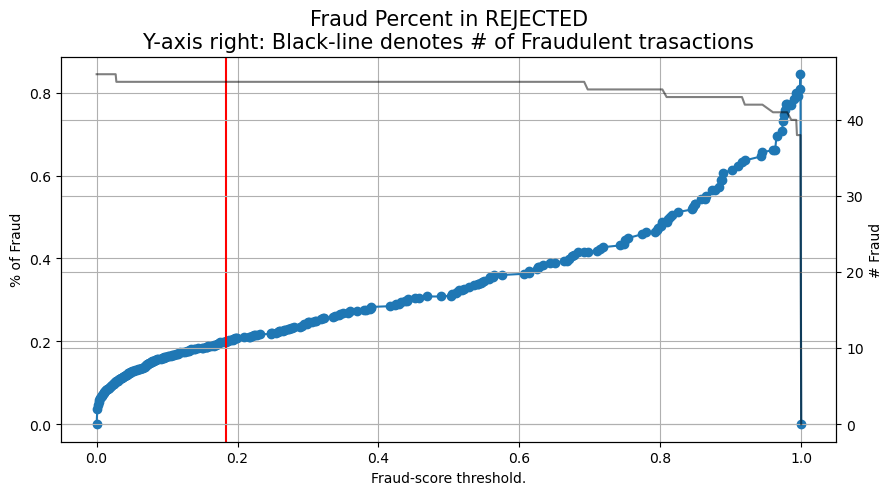

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

threshold_table['rejected_fraud_percent'].plot(
    marker='o',
    grid=True,
    ax=ax)
ax.set_title(
    'Fraud Percent in REJECTED\n'
    'Y-axis right: Black-line denotes # of Fraudulent trasactions',
    fontsize=15)

ax.set_xlabel('Fraud-score threshold.')
ax.set_ylabel('% of Fraud')

ax.axvline(decision_threshold, color='red')

ax_ = ax.twinx()
threshold_table['rejected_nb_fraud'].plot(
    marker='',
    color='black',
    alpha=.5,
    ax=ax_)

ax_.set_ylabel('# Fraud');

In [12]:
charback_rate = threshold_table.loc[
    decision_threshold
]['accepted_fraud_percent']

print(f'The chargeback rate at the decision threshold is: {round(charback_rate * 100, 5)}%')

The chargeback rate at the decision threshold is: 0.00354%


# Confusion Matrix

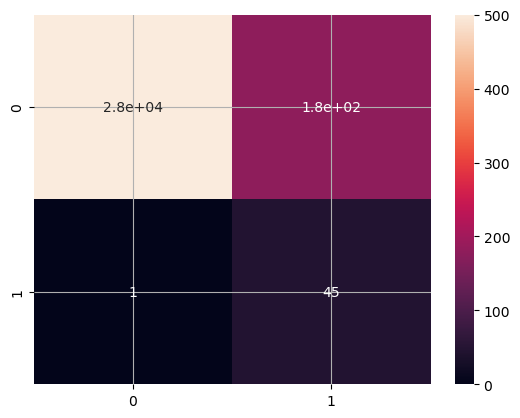

In [30]:
y_pred = (y_score >= decision_threshold).values

cm = confusion_matrix(
    y_true=y_true, 
    y_pred=y_pred)

sns.heatmap(cm, annot=True, robust=True, vmax=500, vmin=0);

In [29]:
sns.heatmap?